<div align="right" style="text-align: right">
<i>TTK21 lecture 2 - 3D geometry<br>September 2021</i>
</div>

# Exercise 2: Epipolar geometry
We are here given two undistorted images of the Holmenkollen ski jump along with the intrinsic calibration and camera poses.
Lets start by loading the data:

In [40]:
%matplotlib inline
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the images.
img1 = cv2.cvtColor(cv2.imread('holmenkollen_00011.jpg'), cv2.COLOR_BGR2RGB)
img2 = cv2.cvtColor(cv2.imread('holmenkollen_00109.jpg'), cv2.COLOR_BGR2RGB)

# The same camera was used for both images, so we use the same intrinsic calibration for both:
f = 2077.14839063367   # "Focal length" f = f_u = f_v
c_u = 693.247999941708 # Principal point (u coordinate)
c_v = 458.649537351898 # Principal point (v coordinate)

# Pose of the camera in the world frame for image 1:
T_w_c1 = np.array([[-0.639624697335995, -0.694022906797833, 0.330473072121957, 3145200.15425671],
                   [-0.628547993532952, 0.224726604006926, -0.744597457205714, 593080.793902705],
                   [0.442501600430481, -0.683981109601282, -0.579967391604961, 5499162.80464172],
                   [0, 0, 0, 1]])

# Pose of the camera in the world frame for image 2:
T_w_c2 = np.array([[-0.625105611303362, -0.715529464633440, 0.311866253317721, 3145236.34478279],
                   [-0.623348537903210, 0.217168312747740, -0.751182084605477, 592986.546582212],
                   [0.469765446804019, -0.663969509224395, -0.581777376501817, 5499122.20246185],
                   [0, 0, 0, 1]])

We can plot the images using matplotlib:

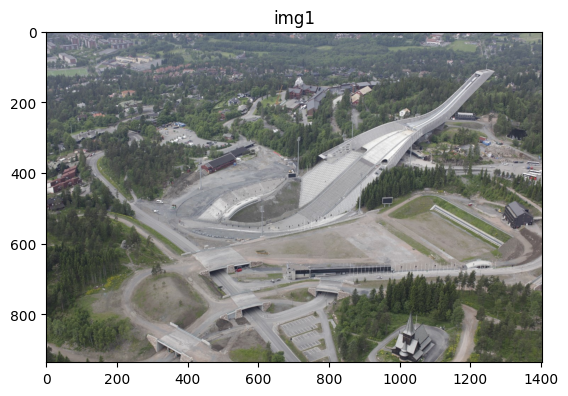

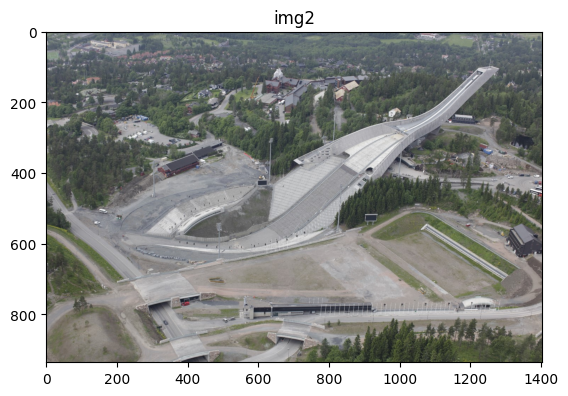

In [41]:
plt.figure()
plt.imshow(img1)
plt.title('img1')
plt.show()

plt.figure()
plt.imshow(img2)
plt.title('img2')
plt.show()

We see that these two images are the same we used in the last example at page 87 in lecture 2.
Your task is to recreate this example:
- Construct the camera calibration matrix $\mathbf{K}$
- Compute the pose of one camera relative to the other.
- Choose one or more points in one image, and compute the epipolar line in the other as a function of depth.
- Plot the epipolar lines.
- Plot a few depths along the epipolar lines.
- Plot the points at infinity.


Resolution:  (936, 1404, 3)


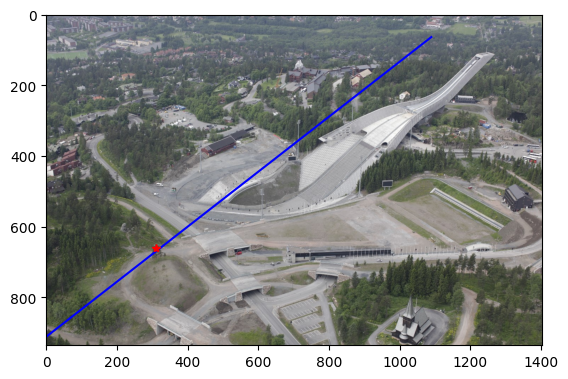

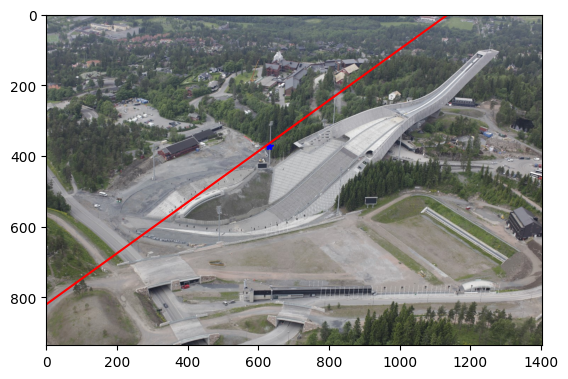

In [153]:
# Write you code here.

# Camera calibration matrix
K = np.array([[f, 0, c_u], [0, f, c_v], [0, 0, 1]])

# The pose of c2 relative to c1
T_c1_c2 = np.linalg.inv(T_w_c1) @ T_w_c2

R_c1_c2 = T_c1_c2[:3, :3]
t_c1_c2 = T_c1_c2[:3, 3]

t_c1_c2_x = np.array([[0, -t_c1_c2[2], t_c1_c2[1]], [t_c1_c2[2], 0, -t_c1_c2[0]], [-t_c1_c2[1], t_c1_c2[0], 0]])
E_c1_c2 = t_c1_c2_x @ R_c1_c2

F_c1_c2 = np.linalg.inv(K.T) @ E_c1_c2 @ np.linalg.inv(K)

# Original point in img1
u1 = np.array([310, 660, 1])
# Original point in img2
u2 = np.array([630, 370, 1])

plt.figure()
# create epiploar line
l = F_c1_c2 @ u2
x = np.linspace(0, 1090, num=500)  # Create an array of x values
y = -(l[0]*x + l[2]) / l[1] # Compute the corresponding y values 
plt.plot(x, y, 'b')
plt.imshow(img1)
# Add point to img1
plt.plot(310, 660, 'r*')

print('Resolution: ', img1.shape)

l = F_c1_c2.T @ u1
# get l as a three dimensional vector
plt.figure()
plt.plot(u2[0], u2[1], 'b*')
# create epiploar line
x = np.linspace(0, img2.shape[1], num=500)  # Create an array of x values
y = -(l[0]*x + l[2]) / l[1] # Compute the corresponding y values 
plt.plot(x, y, 'r')
plt.imshow(img2)
plt.show()
# 



 

Feel free to play around!